# Task 1: Text Classification

#### 1. Download the BBC dataset provided on Moodle. The dataset, created by Greene and Cunningham, 2006 is a collection of 2225 documents from the BBC news website already categorized into 5 classes: business, entertainment, politics, sport, and tech.

In [1]:
import os

# The dataset can be found in the /data/BBC folder
print(os.listdir("../data/BBC"))

['business', 'entertainment', 'politics', 'README.TXT', 'sport', 'tech']


In [2]:
# Dictionary to hold the number of instances of each class
# business/entertainment/politics/sport/tech
category_dict = dict()

category_dict["business"] = len(os.listdir("../data/BBC/business"))
category_dict["entertainment"] = len(os.listdir("../data/BBC/entertainment"))
category_dict["politics"] = len(os.listdir("../data/BBC/politics"))
category_dict["sport"] = len(os.listdir("../data/BBC/sport"))
category_dict["tech"] = len(os.listdir("../data/BBC/tech"))

print("The number of instances in each class", category_dict)

The number of instances in each class {'business': 510, 'entertainment': 386, 'politics': 417, 'sport': 511, 'tech': 401}


In [3]:
num_texts = 0

for value in category_dict.values():
    num_texts += value
print('Total Number of Texts: {num_texts}'.format(num_texts=num_texts))

Total Number of Texts: 2225


#### 2. Plot the distribution of the instances in each class and save the graphic in a file called BBC-distribution.pdf. You may want to use matplotlib.pyplot and savefig to do this. This pre-analysis of the data set will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifier.

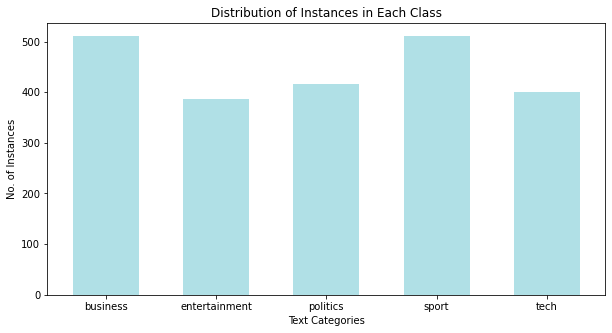

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
categories = list(category_dict.keys())
instances = list(category_dict.values())
  
fig = plt.figure(figsize = (10, 5))
 
# Creating the bar plot
plt.bar(categories, instances, color ='powderblue', width = 0.6)
 
plt.xlabel("Text Categories")
plt.ylabel("No. of Instances")
plt.title("Distribution of Instances in Each Class")
plt.savefig("../output/BBC-distribution.pdf")
plt.show()

#### 3. Load the corpus using load files and make sure you set the encoding to latin1. This will read the file structure and assign the category name to each file from their parent directory name.

In [5]:
from sklearn.datasets import load_files

# Reads the file structure and assign the category name to each file from their parent directory name
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html
res = load_files("../data/BBC", encoding="latin-1")

In [6]:
# The raw text data to learn (list of str)
X = res.data

# The target labels (e.g. business/entertainment/politics/sport/tech) but as an integer index! (e.g. 0/1/2/3/4)
y = res.target

target_names = res.target_names
print("The names of target classes: ", target_names)

print("\nSome examples below: ")
for i in range(0,10):
    text = res.data[i]
    target = res.target[i]
    category = target_names[target]
    print('{text}...{category}'.format(text=text[0:30], category=category))

The names of target classes:  ['business', 'entertainment', 'politics', 'sport', 'tech']

Some examples below: 
Tate & Lyle boss bags top awar...business
Halo 2 sells five million copi...tech
MSPs hear renewed climate warn...politics
Pavey focuses on indoor succes...sport
Tories reject rethink on axed ...politics
Lib Dems predict 'best ever po...politics
Howard attacks 'pay later' Bud...politics
Games win for Blu-ray DVD form...tech
Labour pig poster 'anti-Semiti...politics
Costin aims for comeback in 20...sport


#### 5. Split the dataset into 80% for training and 20% for testing. For this, you must use train test split with the parameter random state set to None

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None)

#### 4. Pre-process the dataset to have the features ready to be used by a multinomial Naive Bayes classifier. This means that the frequency of each word in each class must be computed and stored in a term-document matrix. For this, you can use feature extraction.text.CountVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert a collection of text documents to a matrix of token counts. ("Tokenization")
count_vect = CountVectorizer()

# Xarray of shape (n_samples, n_features)
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform
X_train_counts = count_vect.fit_transform(X_train)

print("Shape of X_train_counts: ", X_train_counts.shape)
print("y_train length: ", len(y_train))

print("\nVocabulary (A Mapping of Terms to Feature Indices)")
vocabulary = count_vect.vocabulary_
names = list(vocabulary.keys())
index = list(vocabulary.values())
for i in range(0,10):
    print(names[i] + ":",index[i])

Shape of X_train_counts:  (1668, 26123)
y_train length:  1668

Vocabulary (A Mapping of Terms to Feature Indices)
dominici: 7802
backs: 2898
lacklustre: 13659
france: 9981
wing: 25670
christophe: 5143
says: 20605
can: 4515
claim: 5225
another: 2227


#### 6. Train a multinomial Naive Bayes Classifier (naive bayes.MultinomialNB) on the training set using the default parameters and evaluate it on the test set.

In [9]:
from sklearn.naive_bayes import MultinomialNB

multinomialNB = MultinomialNB()
clf = multinomialNB.fit(X_train_counts, y_train)

# print(sum(multinomialNB.feature_count_[1,:]))

In [10]:
print("Let's test with a few examples to see if the model makes sense...\n")

docs_new = ['MSFT stock hit $300', 'Intel core processor with 16GB RAM', "GO HABS GO!"]
X_new_counts = count_vect.transform(docs_new)

predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, target_names[category]))

Let's test with a few examples to see if the model makes sense...

'MSFT stock hit $300' => business
'Intel core processor with 16GB RAM' => tech
'GO HABS GO!' => sport


In [11]:
# Now let's actually test the model using X_text, y_test

X_test_counts = count_vect.transform(X_test)

y_predicted = clf.predict(X_test_counts)

#### 7. In a file called bbc-performance.txt, save the following information: (to make it easier for the TAs, make sure that your output for each sub-question below is clearly marked in your output file, using the headings (a), (b) . . .)

##### (a) a clear separator (a sequence of hyphens or stars) and string clearly describing the model (e.g. “MultinomialNB default values, try 1”)

In [12]:
# Create a file that can be appended to
file_performance = open("../output/bbc-performance.txt", "a")

# Clear contents
file_performance.truncate(0)

def write_model_name_to_file(model_name):
    file_performance.write("\n(a) **** {model_name} ****\n\n".format(model_name=model_name))

write_model_name_to_file("MultinomialNB default values, try 1")
print("Writing to file...")

Writing to file...


##### (b) the confusion matrix (you can use confusion matrix)

In [13]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_predicted)

def print_confusion_matrix(cf_matrix):
    print('Confusion Matrix:\n {cf_matrix}'.format(cf_matrix=cf_matrix))
    
def write_confusion_matrix_to_file(cf_matrix):
    file_performance.write("(b) Confusion Matrix" + "\n\n")
    np.savetxt(file_performance, X=cf_matrix.astype(int), fmt ='%i\t')
    file_performance.write("\n")
    
print_confusion_matrix(cf_matrix)
write_confusion_matrix_to_file(cf_matrix)

Confusion Matrix:
 [[117   0   5   0   2]
 [  0 102   4   0   1]
 [  2   0  96   0   0]
 [  1   0   0 124   0]
 [  0   0   2   0 101]]


##### (c) the precision, recall, and F1-measure for each class (you can use classification report)

In [14]:
from sklearn import metrics

def print_classification_report(y_test, y_predicted, target_names):
    report = metrics.classification_report(y_test, y_predicted, target_names=target_names)
    print(report)
    
def write_classification_report_to_file(y_test, y_predicted, target_names):
    report = metrics.classification_report(y_test, y_predicted, target_names=target_names)
    file_performance.write("(c) Classification Report\n\n" + report)
    file_performance.write("\n")
    
print_classification_report(y_test, y_predicted, target_names)
write_classification_report_to_file(y_test, y_predicted, target_names)

               precision    recall  f1-score   support

     business       0.97      0.94      0.96       124
entertainment       1.00      0.95      0.98       107
     politics       0.90      0.98      0.94        98
        sport       1.00      0.99      1.00       125
         tech       0.97      0.98      0.98       103

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557



##### (d) the accuracy, macro-average F1 and weighted-average F1 of the model (you can use accuracy score and f1 score)

In [15]:
from sklearn.metrics import accuracy_score, f1_score

def print_scores(y_test,y_predicted):
    print("Accuracy Score: ", accuracy_score(y_test, y_predicted))
    print("Macro-Average F1: ", f1_score(y_test, y_predicted, average="macro"))
    print("Weighted-Average F1: ", f1_score(y_test, y_predicted, average="weighted"))
    
def write_scores_to_file(y_test,y_predicted):
    file_performance.write("(d) Accuracy, Macro-Average F1 and Weighted-Average F1\n\n")
    file_performance.write("Accuracy Score: " + str(accuracy_score(y_test, y_predicted)) + "\n")
    file_performance.write("Macro-Average F1: " + str(f1_score(y_test, y_predicted, average="macro")) + "\n")
    file_performance.write("Weighted-Average F1: " + str(f1_score(y_test, y_predicted, average="weighted")) + "\n")
    file_performance.write("\n")

print_scores(y_test, y_predicted)
write_scores_to_file(y_test,y_predicted)

Accuracy Score:  0.9694793536804309
Macro-Average F1:  0.9687015321382393
Weighted-Average F1:  0.9697552231430182


##### (e) the prior probability of each class

In [16]:
# Recall at the beginning we counted the size of each class
print(category_dict)
print('Total Number of Texts: {num_texts}'.format(num_texts=num_texts))

{'business': 510, 'entertainment': 386, 'politics': 417, 'sport': 511, 'tech': 401}
Total Number of Texts: 2225


In [17]:
# Returns a dictionary that holds the prior probabilities of each class
def compute_prior_probabilities(multinomialNB):
    class_count = multinomialNB.class_count_
    total = sum(class_count)
    prior_dict = dict()
    
    for i in range(len(class_count)):
        target = target_names[i]
        probability = class_count[i] / total
        prior_dict[target] = round(probability, 4)
        
    return prior_dict

def print_class_count(multionomialNB):
    class_count = multinomialNB.class_count_
    total = sum(class_count)
    print("The number of samples encountered for each class: {class_count}".format(class_count=class_count))
    print("The total number of samples: {total}".format(total=total))
    
def print_prior_probabilities(multinomialNB):
    prior_dict = compute_prior_probabilities(multinomialNB)
    print("The prior probabilities of each class: {prior_dict}".format(prior_dict=prior_dict))
    
def write_prior_probabilities_to_file(multinomialNB):
    file_performance.write("(e) Prior Probability of Each Class F1\n\n")
    prior_dict = compute_prior_probabilities(multinomialNB)
    for key in prior_dict:
        category = key
        probability = prior_dict[key]
        file_performance.write("{category}: {probability:.4f}".format(category=category, probability=probability))
        file_performance.write("\n")
    file_performance.write("\n")
    
print_class_count(multinomialNB)
print_prior_probabilities(multinomialNB)
write_prior_probabilities_to_file(multinomialNB)

The number of samples encountered for each class: [386. 279. 319. 386. 298.]
The total number of samples: 1668.0
The prior probabilities of each class: {'business': 0.2314, 'entertainment': 0.1673, 'politics': 0.1912, 'sport': 0.2314, 'tech': 0.1787}


##### (f) the size of the vocablary (i.e. the number of different words). For example, if the word potato appears 3 times, you only count it once.

In [18]:
vocabulary_size = len(vocabulary.keys())

def print_vocabulary_size(multinomialNB):
    print("The size of the vocabulary: {vocabulary_size}\n".format(vocabulary_size = vocabulary_size))
    print("Note that this can also be deduced by the number of columns (features) in the document-term matrix: ", X_train_counts.shape[1])
    print("Or this can be computed from the feature counts of the MultionomialNB: ", multinomialNB.feature_count_.shape[1])

def write_vocabulary_size_to_file(multinomialNB):
    file_performance.write("(f) The Size of the Vocablary\n")
    # The number of columns in the term document matrix
    vocabulary_size = multinomialNB.feature_count_.shape[1]
    file_performance.write("The size of the vocabulary: {vocabulary_size}\n".format(vocabulary_size = vocabulary_size))
    file_performance.write("\n")

print_vocabulary_size(multinomialNB)
write_vocabulary_size_to_file(multinomialNB)

The size of the vocabulary: 26123

Note that this can also be deduced by the number of columns (features) in the document-term matrix:  26123
Or this can be computed from the feature counts of the MultionomialNB:  26123


##### (g) the number of word-tokens in each class (i.e. the number of words in total). For example, if the word potato appears 3 times, you count it 3 times.

In [19]:
# generates a dictionary containing the number of word-tokens in each class
def compute_word_token_dict(multinomialNB):
    word_token_dict = dict()
    class_count = multinomialNB.class_count_
    feature_count = multinomialNB.feature_count_
    
    for i in range(len(class_count)):
        target = target_names[i]
        # Take the sum of all the words for that class
        word_token_dict[target] = sum(feature_count[i, :])
        
    return word_token_dict
    
def print_word_tokens_by_class(multinomialNB):
    word_token_dict = compute_word_token_dict(multinomialNB)
    print("The number of word tokens by class: ", word_token_dict)
    
def write_word_tokens_by_class_to_file(multinomialNB):
    file_performance.write("(g) The number of word-tokens in each class (i.e. the number of words in total)\n")
    word_token_dict = compute_word_token_dict(multinomialNB)
    file_performance.write("The number of word tokens by class: " +  str(word_token_dict))
    file_performance.write("\n\n")

print_word_tokens_by_class(multinomialNB)
write_word_tokens_by_class_to_file(multinomialNB)

The number of word tokens by class:  {'business': 123791.0, 'entertainment': 89372.0, 'politics': 142682.0, 'sport': 120788.0, 'tech': 144985.0}


##### (h) the number of word-tokens in the entire corpus

In [20]:
def compute_total_word_

def print_word_tokens_total(multinomialNB):
    feature_count_ = multinomialNB.feature_count
    total = feature_count.sum()
    print("Total word-tokens in the corpus: ", total)

def write_word_tokens_total_to_file(multinomialNB):
    file_performance.write("(h) The number of word-tokens in the entire corpus\n")
    feature_count_ = multinomialNB.feature_count
    total = feature_count.sum()
    file_performance.write("Total word-tokens in the corpus: " + str(total))
    file_performance.write("\n\n")
    
print_word_tokens_total(multinomialNB)
write_word_tokens_total_to_file(multinomialNB)

Total word-tokens in the corpus:  621618.0


##### (i) the number and percentage of words with a frequency of zero in each class

In [21]:
def print_count_and_percentage(x, y, class_name):
    print("Count for {class_name}: {count}".format(class_name=class_name, count=x))
    print("Percentage for {class_name}: {percentage:.2%}".format(class_name=class_name, percentage=x/y))
    print("\n")

def write_count_and_percentage_to_file(x, y, class_name):
    file_performance.write("Count for {class_name}: {count}".format(class_name=class_name, count=x))
    file_performance.write("\n")
    file_performance.write("Percentage for {class_name}: {percentage:.2%}".format(class_name=class_name, percentage=x/y))
    file_performance.write("\n")
    
# returns a dictionary containing the number of words with a frequency zero in each class
def compute_frequency_zero_words(multinomialNB):
    frequency_zero_dict = dict()
    feature_count = multinomialNB.feature_count_
    num_features = feature_count.shape[1]
    
    for i in range(len(target_names)):
        target = target_names[i]
        count_zero = num_features - np.count_nonzero(feature_count[i,:])
        frequency_zero_dict[target] = count_zero
        
    return frequency_zero_dict
    
def print_words_with_frequency_zero(multinomialNB):
    feature_count = multinomialNB.feature_count_
    num_features = feature_count.shape[1]
    frequency_zero_dict = compute_frequency_zero_words(multinomialNB)
    print("Recall that the number of features is: {num_features}".format(num_features = num_features))
    print("The number and percentage of words with a frequency of ZERO in each class is outlined below\n")
    
    for key in frequency_zero_dict:
        print_count_and_percentage(frequency_zero_dict[key], num_features, key)
    
def write_words_with_frequency_zero_to_file(multinomialNB):
    file_performance.write("(i) the number and percentage of words with a frequency of zero in each class\n")
    feature_count = multinomialNB.feature_count_
    num_features = feature_count.shape[1]
    frequency_zero_dict = compute_frequency_zero_words(multinomialNB)
    
    for key in frequency_zero_dict:
        write_count_and_percentage_to_file(frequency_zero_dict[key], num_features, key)
    
print_words_with_frequency_zero(multinomialNB)
write_words_with_frequency_zero_to_file(multinomialNB)

Recall that the number of features is: 26123
The number and percentage of words with a frequency of ZERO in each class is outlined below

Count for business: 15752
Percentage for business: 60.30%


Count for entertainment: 16318
Percentage for entertainment: 62.47%


Count for politics: 15918
Percentage for politics: 60.93%


Count for sport: 16765
Percentage for sport: 64.18%


Count for tech: 15581
Percentage for tech: 59.64%




##### (j) the number and percentage of words with a frequency of one in the entire corpus

In [22]:
def get_num_words_with_frequency_one(multinomialNB):
    feature_count = multinomialNB.feature_count_
    frequency_zero_dict = compute_frequency_zero_words(multinomialNB)

def print_num_words_with_frequency_one(total, vocabulary_size):
    print("The number of words with a frequency of one in the entire corpus: ", total)
    print("The percentage of words with a frequency of one in the entire corpus: {percentage:.2%}".format(percentage=(total/vocabulary_size)))
    
def write_num_words_with_frequency_one_to_file(total, vocabulary_size):
    file_performance.write("(j) the number and percentage of words with a frequency of one in the entire corpus\n")
    file_performance.write("The number of words: " + str(total))
    file_performance.write("\n")
    file_performance.write("The percentage of words: {percentage:.2%}".format(percentage=(total/vocabulary_size)))
    file_performance.write("\n\n")
    
# num_words_with_frequency_one = get_num_words_with_frequency_one()

# print_num_words_with_frequency_one(num_words_with_frequency_one, vocabulary_size)
# write_num_words_with_frequency_one_to_file(num_words_with_frequency_one, vocabulary_size)

AttributeError: 'list' object has no attribute 'toarray'

##### (k) your 2 favorite words (that are present in the vocabulary) and their log-prob

In [ ]:
feature_index_1 = vocabulary["executive"]
feature_index_2 = vocabulary["the"]

print("Index of word 'executive': {index}".format(index = feature_index_1))
print("Index of word 'the': {index}".format(index = feature_index_2))

p1 = multinomialNB.feature_log_prob_

log_prob_1 = sum(p1[:, feature_index_1])
log_prob_2 = sum(p1[:, feature_index_2])

def print_log_prob():
    print("\n")
    print("log_prob of word 'executive': ", str(log_prob_1))
    print("log_prob of word 'the': ", str(log_prob_2))
    
def write_log_prob_to_file():
    file_performance.write("(k) your 2 favorite words (that are present in the vocabulary) and their log-prob\n")
    file_performance.write("log_prob of word 'executive': " + str(log_prob_1))
    file_performance.write("\n")
    file_performance.write("log_prob of word 'the': " + str(log_prob_2))
    file_performance.write("\n")

print_log_prob()
write_log_prob_to_file()

# Makes sense that the log_prob of "the" is higher than the log_prob of "executive"!

#### 8. Redo steps 6 and 7 without changing anything (do not redo step 5, the dataset split). Change the model name to something like “MultinomialNB default values, try 2” and append the results to the file bbc-performance.txt.

In [ ]:
def write_separator_to_file():
    file_performance.write("\n---------------------------------------------------------------------\n")

def write_model_to_file(model_name, cf_matrix, y_test, y_predicted, target_names):
    write_separator_to_file()
    write_model_name_to_file(model_name)
    write_confusion_matrix_to_file(cf_matrix)
    write_classification_report_to_file(y_test, y_predicted, target_names)
    write_scores_to_file(y_test, y_predicted2)
    write_prior_probabilities_to_file(prior_dict)
    write_vocabulary_size_to_file(vocabulary_size)
    write_word_tokens_by_class_to_file(word_tokens_by_class)
    write_word_tokens_total_to_file()
    write_words_with_frequency_zero_to_file()
    write_num_words_with_frequency_one_to_file(num_words_with_frequency_one, vocabulary_size)
    write_log_prob_to_file()    

In [ ]:
# Multinomial NB, take #2

clf2 = multinomialNB.fit(X_train, y_train)
y_predicted2 = clf2.predict(X_test)

cf_matrix2 = confusion_matrix(y_test, y_predicted2)

print(cf_matrix2)
print("\n")
print_classification_report(y_test, y_predicted2, target_names)
print_scores(y_test, y_predicted2)

write_model_to_file("MultinomialNB default values, try 2", cf_matrix2, y_test, y_predicted2, target_names)

#### 9. Redo steps 6 and 7 again, but this time, change the smoothing value to 0.0001. Append the results at the end of bbc-performance.txt.

In [ ]:
multinomialNB3 = MultinomialNB(alpha = 0.0001)

clf3 = multinomialNB3.fit(X_train, y_train)
y_predicted3 = clf3.predict(X_test)

cf_matrix3 = confusion_matrix(y_test, y_predicted3)

print(cf_matrix3)
print("\n")
print_classification_report(y_test, y_predicted3, target_names)
print_scores(y_test, y_predicted3)

write_model_to_file("MultinomialNB (smoothing = 0.0001)", cf_matrix3, y_test, y_predicted3, target_names)

#### 10. Redo steps 6 and 7, but this time, change the smoothing value to 0.9. Append the results at the end of bbc-performance.txt.

In [ ]:
multinomialNB4 = MultinomialNB(alpha = 0.9)

clf4 = multinomialNB4.fit(X_train, y_train)
y_predicted4 = clf4.predict(X_test)

cf_matrix4 = confusion_matrix(y_test, y_predicted4)

print(cf_matrix4)
print("\n")
print_classification_report(y_test, y_predicted4, target_names)
print_scores(y_test, y_predicted4)

write_model_to_file("MultinomialNB (smoothing = 0.9)", cf_matrix4, y_test, y_predicted4, target_names)

#### 11. In a separate plain text file called bbc-discussion.txt, explain in 1 to 2 paragraphs:

##### (a) what metric is best suited to this dataset/task and why (see step (2))

##### (b) why the performance of steps (8-10) are the same or are different than those of step (7) above.

In [ ]:
file_performance.close()